In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

%load_ext autoreload
%autoreload 2

## Simulation

Text(0.5, 1.05, 'Simulated Dataset')

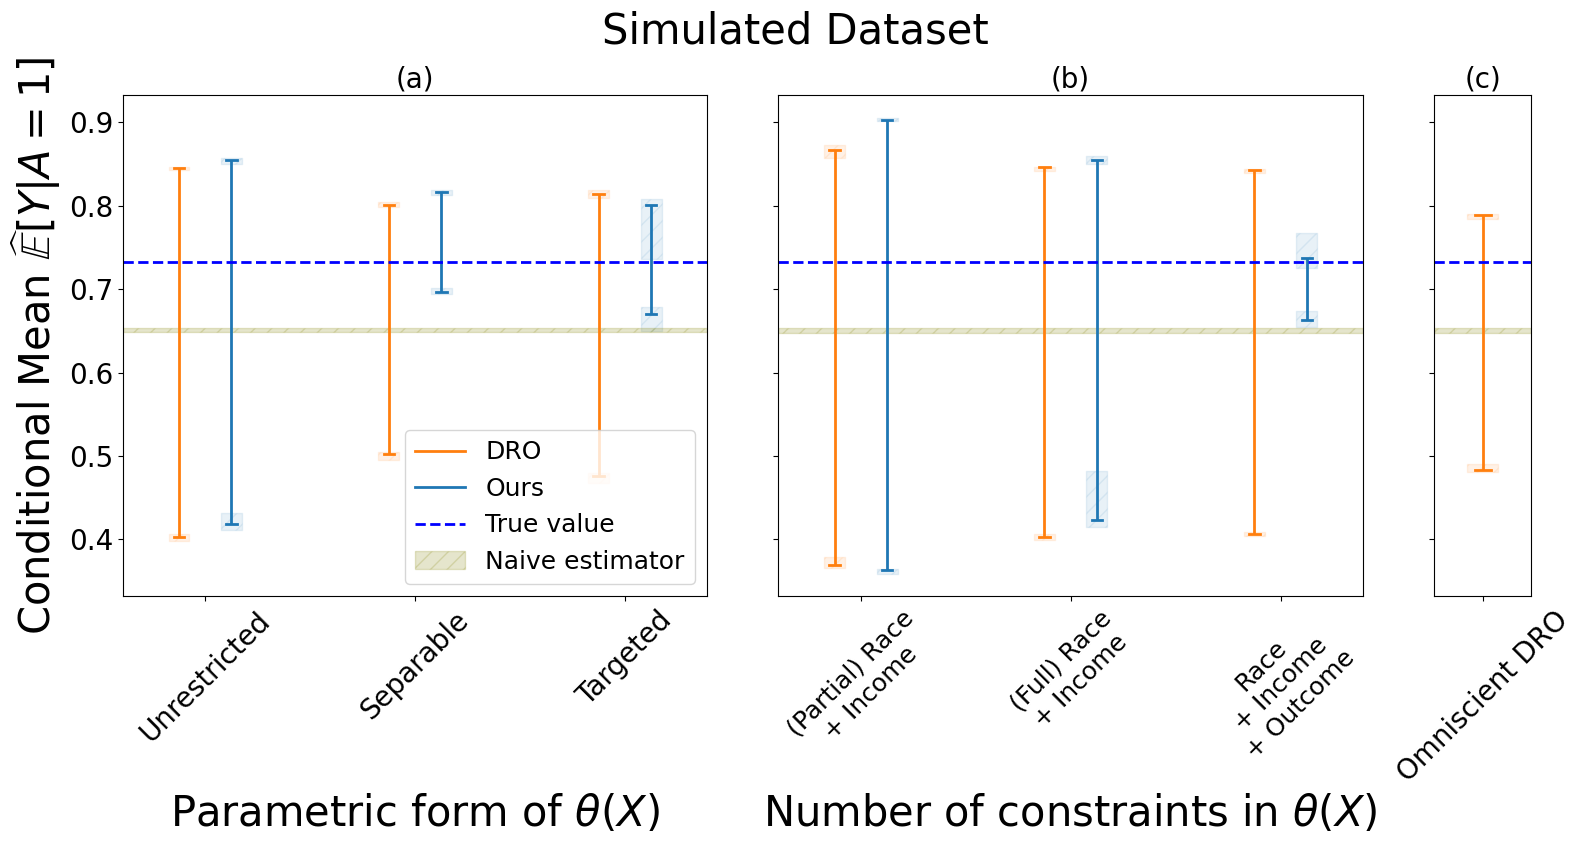

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


plotting_df_constraints = utils.generate_constraints_plots(
    base_path="../experiment_artifacts/",
    timestamp_ours="Jan26-2138",
    timestamp_dro="Jan26-2140",
    ax=ax[0],
)

plotting_df_theta = utils.generate_theta_plots(
    base_path="../experiment_artifacts/",
    timestamp_ours="Jan26-2151",
    timestamp_dro="Jan26-2153",
    ax=ax[1],
)

plotting_df_omni = utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="Jan26-2126",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(a)", fontsize=20)
ax[1].set_title("(b)", fontsize=20)
ax[2].set_title("(c)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Simulated Dataset", fontsize=30, y=1.05)
# fig.savefig("../synthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

In [ ]:
print(
    f"True conditional mean: {plotting_df_constraints['true_conditional_mean'].mean():.3f}"
)
display(
    plotting_df_constraints.replace(
        {
            "unrestricted": "Unrestricted",
            "separable": "Separable",
            "targeted": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True conditional mean: {plotting_df_theta['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_theta.replace(
        {
            "DRO_worst_case": "DRO",
            "count_minus": "(Partial) Race + Income",
            "count": "(Full) Race + Income",
            "count_plus": "Race + Income + Outcome",
        }
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

display(
    plotting_df_omni[plotting_df_omni["restriction_type"] == "DRO"]
    .replace(
        {
            "DRO": "DRO Omniscient",
            "Nx12": "Unrestricted",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True conditional mean: 0.733


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                  0.501  0.004     0.801  0.003
             Ours                 0.697  0.003     0.816  0.002
Targeted     DRO                  0.475  0.005     0.814  0.004
             Ours                 0.666  0.011     0.786  0.033
Unrestricted DRO                  0.402  0.003     0.845  0.002
             Ours                 0.420  0.008     0.854  0.003

True conditional mean: 0.733


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income        0.436  0.029     0.855   
(Partial) Race + Income (Partial) Race + Income     0.362  0.002     0.903   
DRO                     (Full) Race + Income        0.403  0.003     0.845   
                        (Partial) Race + Income     0.372  0.006     0.866   
                        Race + Income + Outcome     0.407  0.002     0.842   
Race + Income + Outcome Race + Income + Outcome     0.663  0.008     0.744   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.004  
(Partial) Race + Income (Partial) Race + Income  0.002  
DRO                     (Full) Race + Income     0.002  
                        (Partial) Race + Income  0.007  
                        Race + Income + Outcome  0.002  
Race + Income + Outcome Race + Income + Outcome  0.017

min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
unrestricted DRO Omniscient       0.485  0.004     0.788  0.003

## Folktables

Text(0.5, 1.05, 'Semi-Synthetic Dataset')

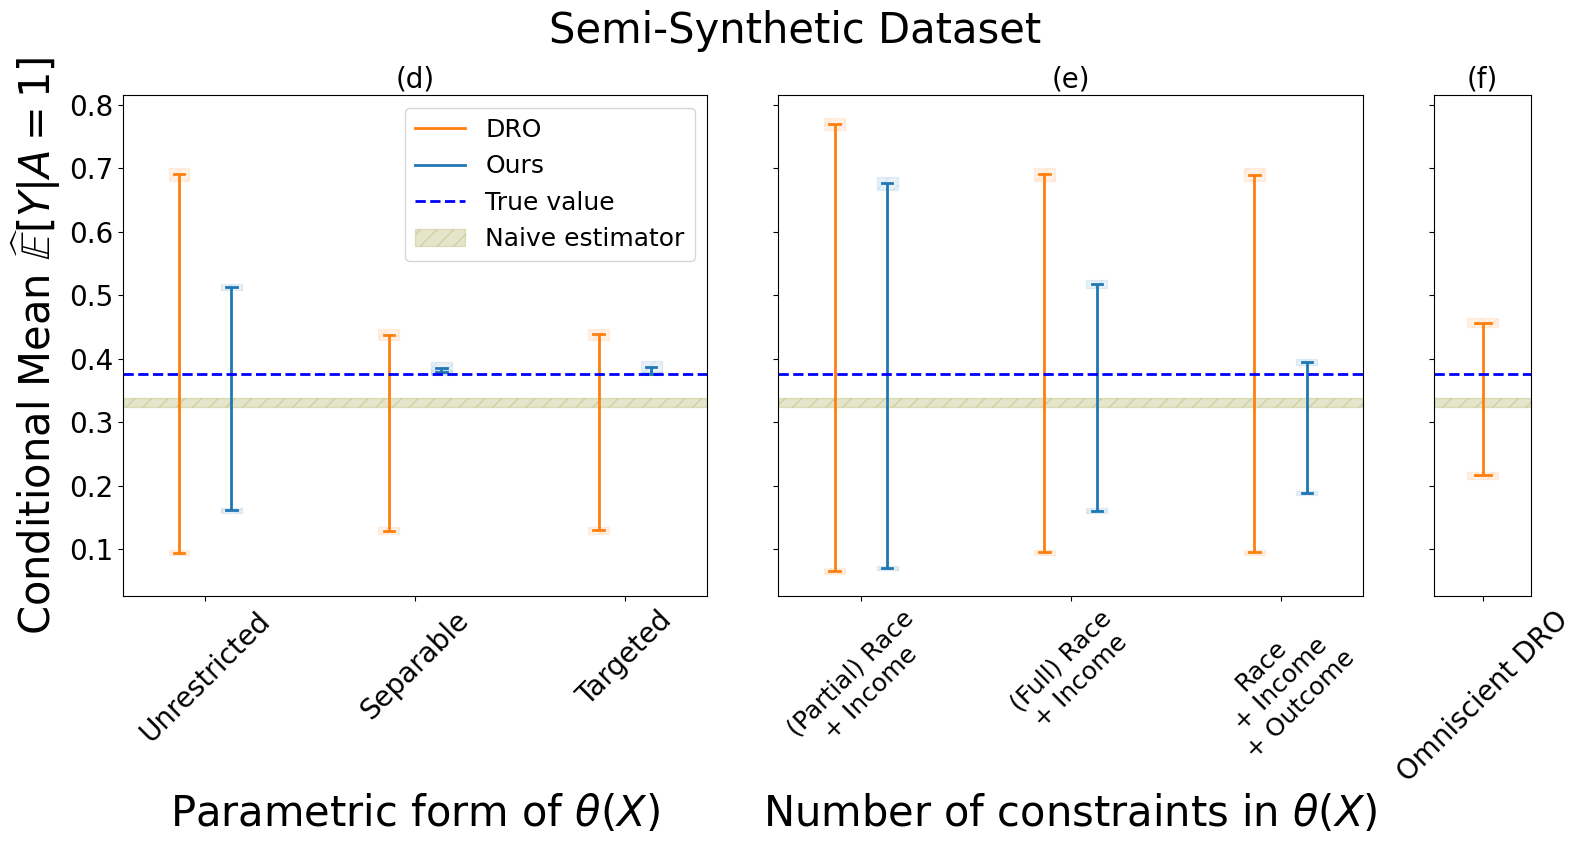

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


plotting_df_constraints = utils.generate_constraints_plots(
    base_path="../experiment_artifacts/",
    timestamp_ours="Jan26-2316",
    timestamp_dro="Jan26-2317",
    ax=ax[0],
)

plotting_df_theta = utils.generate_theta_plots(
    base_path="../experiment_artifacts/",
    timestamp_ours="Jan26-2313",
    timestamp_dro="Jan26-2315",
    ax=ax[1],
)
plotting_df_omni = utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="Jan26-2311",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="upper right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(d)", fontsize=20)
ax[1].set_title("(e)", fontsize=20)
ax[2].set_title("(f)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Synthetic Dataset", fontsize=30, y=1.05)
# fig.savefig("../semisynthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

In [ ]:
print(
    f"True conditional mean: {plotting_df_constraints['true_conditional_mean'].mean():.3f}"
)
display(
    plotting_df_constraints.replace(
        {
            "unrestricted": "Unrestricted",
            "separable": "Separable",
            "targeted": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True conditional mean: {plotting_df_theta['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_theta.replace(
        {
            "DRO_worst_case": "DRO",
            "count_minus": "(Partial) Race + Income",
            "count": "(Full) Race + Income",
            "count_plus": "Race + Income + Outcome",
        }
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

display(
    plotting_df_omni[plotting_df_omni["restriction_type"] == "DRO"]
    .replace(
        {
            "DRO": "DRO Omniscient",
            "Nx12": "Unrestricted",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True conditional mean: 0.376


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                  0.129  0.006     0.438  0.009
             Ours                 0.378  0.004     0.385  0.010
Targeted     DRO                  0.130  0.006     0.438  0.010
             Ours                 0.377  0.002     0.387  0.010
Unrestricted DRO                  0.095  0.005     0.691  0.011
             Ours                 0.161  0.004     0.513  0.006

True conditional mean: 0.376


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income        0.161  0.004     0.517   
(Partial) Race + Income (Partial) Race + Income     0.071  0.004     0.676   
DRO                     (Full) Race + Income        0.095  0.004     0.690   
                        (Partial) Race + Income     0.066  0.005     0.769   
                        Race + Income + Outcome     0.095  0.005     0.690   
Race + Income + Outcome Race + Income + Outcome     0.188  0.003     0.395   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.007  
(Partial) Race + Income (Partial) Race + Income  0.012  
DRO                     (Full) Race + Income     0.011  
                        (Partial) Race + Income  0.010  
                        Race + Income + Outcome  0.012  
Race + Income + Outcome Race + Income + Outcome  0.005

min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
unrestricted DRO Omniscient       0.216  0.007     0.457  0.008

## Regression

KeyError: ('unrestricted', 'DRO_worst_case')

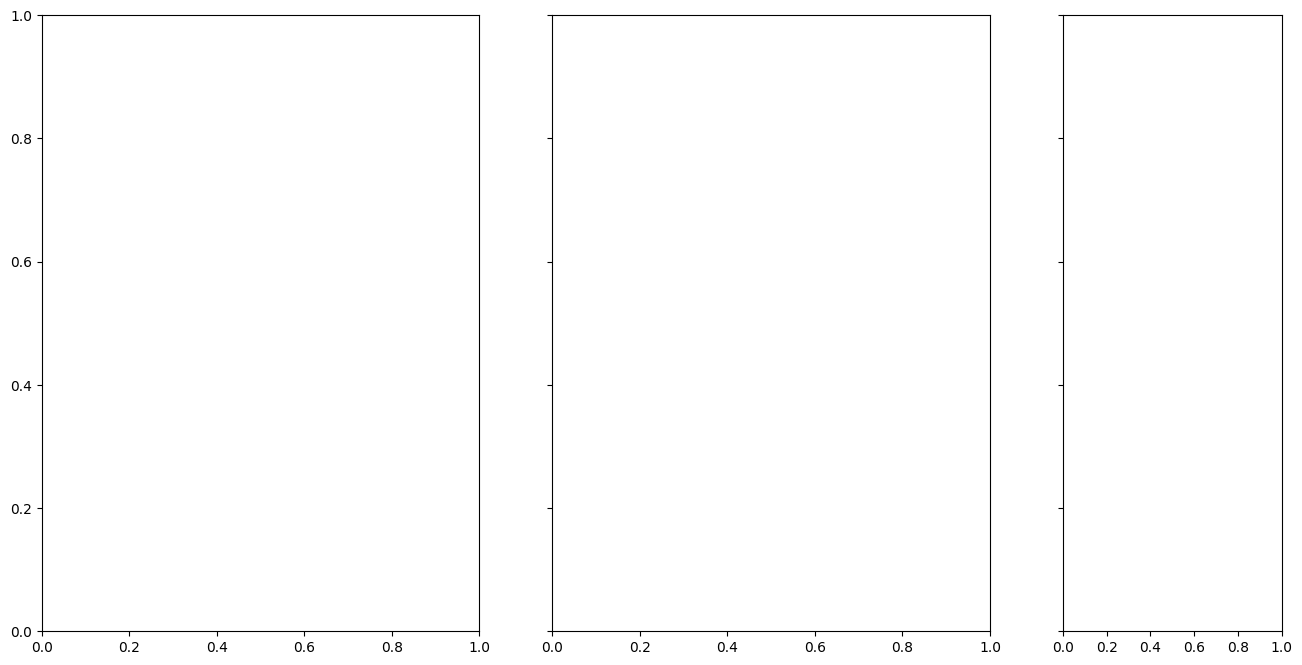

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[2, 2, 1])

plotting_df_12 = utils.generate_constraints_plots_regression(
    base_path="../experiment_artifacts/",
    timestamp_ours="regression_1_2",
    timestamp_dro="Oct13-2224",
    ax=ax[0],
)

plotting_df_34 = utils.generate_theta_plots_regression(
    base_path="../experiment_artifacts/",
    timestamp_ours="regression_3_4",
    timestamp_dro="Oct14-0552",
    ax=ax[1],
)

plotting_df_omni = utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="Oct14-1316",
    ax=ax[2],
    empirical_field="empirical_coef",
    true_field="true_coef",
)

handles, labels = ax[1].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-2:]
relevant_labels = labels[0:1] + labels[-2:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Synthetic Dataset", fontsize=30, y=1.05)

fig.savefig("../regression_coeff.png", dpi=300, bbox_inches="tight")

In [9]:
print(f"True coefficient: {plotting_df_12['true_coef'].mean():.3f}")
display(
    plotting_df_12.replace(
        {
            "Nx12": "Unrestricted",
            "Nx6": "Separable",
            "Nx8": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True coefficient: {plotting_df_34['true_coef'].mean():.3f}")
display(
    plotting_df_34.replace(
        {"count": "(Full) Race + Income", "count_plus": "Race + Income + Outcome"}
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True coefficient: -0.305


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                 -0.345  0.013    -0.055  0.033
             Ours                -0.305  0.010    -0.303  0.009
Unrestricted DRO                 -0.513  0.026     0.112  0.011
             Ours                -0.492  0.022     0.062  0.036

True coefficient: -0.305


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income       -0.492  0.022     0.062   
DRO_worst_case          (Full) Race + Income       -0.515  0.028     0.123   
                        Race + Income + Outcome    -0.509  0.029     0.110   
Race + Income + Outcome Race + Income + Outcome    -0.304  0.057    -0.079   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.036  
DRO_worst_case          (Full) Race + Income     0.025  
                        Race + Income + Outcome  0.017  
Race + Income + Outcome Race + Income + Outcome  0.011

In [10]:
plotting_df_34.groupby(["restriction_type"])[["min_bound", "max_bound"]].agg(
    ["mean", "std"]
).round(3)

min_bound        max_bound       
                      mean    std      mean    std
restriction_type                                  
DRO_worst_case      -0.512  0.029     0.117  0.022
count               -0.492  0.022     0.062  0.036
count_plus          -0.304  0.057    -0.079  0.011

## Logistic Regression

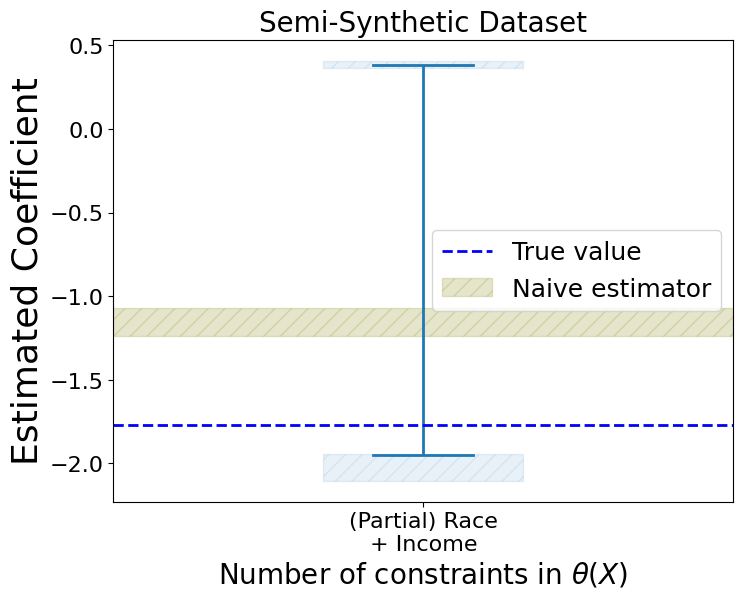

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

plotting_df_logistic = utils.generate_logistic_plot(
    base_path="../experiment_artifacts/", timestamp="Oct19-1206", ax=ax
)

handles, labels = ax.get_legend_handles_labels()
relevant_handles = handles[-2:]
relevant_labels = labels[-2:]
ax.legend(
    loc="center right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax.set_title("Semi-Synthetic Dataset", fontsize=20)
fig.savefig("../logistic.png")

In [12]:
print(f"True coefficient: {plotting_df_logistic['true_coef'].mean():.3f}")
plotting_df_logistic.groupby(["restriction_type"])[["min_bound", "max_bound"]].agg(
    ["mean", "std"]
).round(3)

True coefficient: -1.769


min_bound        max_bound       
                      mean    std      mean    std
restriction_type                                  
count_minus         -1.998  0.069     0.382  0.019

## Covariance

Text(0.5, 1.0, 'Semi-Synthetic Dataset')

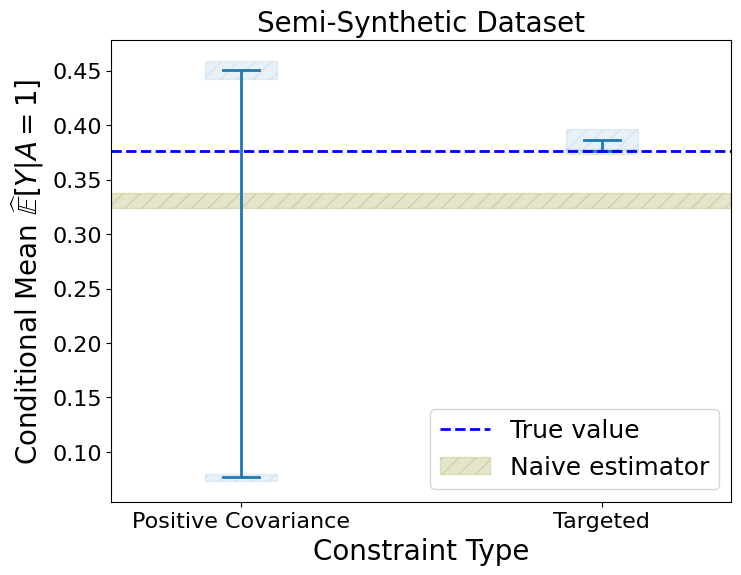

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

plotting_df_cov = utils.generate_cov_plots(
    base_path="../experiment_artifacts/", timestamp="Jan27-0104", ax=ax
)

handles, labels = ax.get_legend_handles_labels()
relevant_handles = handles[-2:]
relevant_labels = labels[-2:]
ax.legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax.set_title("Semi-Synthetic Dataset", fontsize=20)
# fig.savefig("../semisynthetic_cov_restriction.png")

In [5]:
plotting_df_cov.groupby(["restriction_type"])[["min_bound", "max_bound"]].agg(
    ["mean", "std"]
).round(3)

min_bound        max_bound       
                      mean    std      mean    std
restriction_type                                  
count                0.376  0.003     0.387  0.010
cov_positive         0.077  0.003     0.451  0.009